In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('datasets.csv')
df.head(4)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1.312228e+06,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,20/12/15,0.03,1.0,0.0,0.0,No License,5,1,1,Not specified
1,4.527754e+07,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,01/05/23,0.24,139.0,364.0,2.0,No License,4.67,2,1,1
2,9.710000e+17,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,18/12/23,1.67,1.0,343.0,6.0,Exempt,4.17,1,2,1
3,3.857863e+06,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,17/09/23,1.38,2.0,363.0,12.0,No License,4.64,1,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20770 entries, 0 to 20769
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20770 non-null  float64
 1   name                            20770 non-null  object 
 2   host_id                         20770 non-null  int64  
 3   host_name                       20770 non-null  object 
 4   neighbourhood_group             20770 non-null  object 
 5   neighbourhood                   20763 non-null  object 
 6   latitude                        20763 non-null  float64
 7   longitude                       20763 non-null  float64
 8   room_type                       20763 non-null  object 
 9   price                           20736 non-null  float64
 10  minimum_nights                  20763 non-null  float64
 11  number_of_reviews               20763 non-null  float64
 12  last_review                     

In [4]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,beds
count,2.077000e+04,2.077000e+04,20763.000000,20763.000000,20736.000000,20763.000000,20763.000000,20763.000000,20763.000000,20763.000000,20763.000000,20770.000000
mean,3.033858e+17,1.749049e+08,40.726821,-73.939179,187.714940,28.558493,42.610605,1.257589,18.866686,206.067957,10.848962,1.723592
std,3.901221e+17,1.725657e+08,0.060293,0.061403,1023.245124,33.532697,73.523401,1.904472,70.921443,135.077259,21.354876,1.211993
min,2.595000e+03,1.678000e+03,40.500314,-74.249840,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000,1.000000
25%,2.707260e+07,2.041184e+07,40.684159,-73.980755,80.000000,30.000000,4.000000,0.210000,1.000000,87.000000,1.000000,1.000000
50%,4.992852e+07,1.086990e+08,40.722890,-73.949597,125.000000,30.000000,14.000000,0.650000,2.000000,215.000000,3.000000,1.000000
75%,7.220000e+17,3.143997e+08,40.763106,-73.917475,199.000000,30.000000,49.000000,1.800000,5.000000,353.000000,15.000000,2.000000
max,1.050000e+18,5.504035e+08,40.911147,-73.713650,100000.000000,1250.000000,1865.000000,75.490000,713.000000,365.000000,1075.000000,42.000000


In [5]:
## Checking Null Values
df.isna().sum()
df.dropna(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20736 entries, 0 to 20769
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20736 non-null  float64
 1   name                            20736 non-null  object 
 2   host_id                         20736 non-null  int64  
 3   host_name                       20736 non-null  object 
 4   neighbourhood_group             20736 non-null  object 
 5   neighbourhood                   20736 non-null  object 
 6   latitude                        20736 non-null  float64
 7   longitude                       20736 non-null  float64
 8   room_type                       20736 non-null  object 
 9   price                           20736 non-null  float64
 10  minimum_nights                  20736 non-null  float64
 11  number_of_reviews               20736 non-null  float64
 12  last_review                     

In [7]:
df['id'] =df['id'].astype('int')
df['last_review'] = pd.to_datetime(df['last_review'])


### Analysis

<Axes: xlabel='price'>

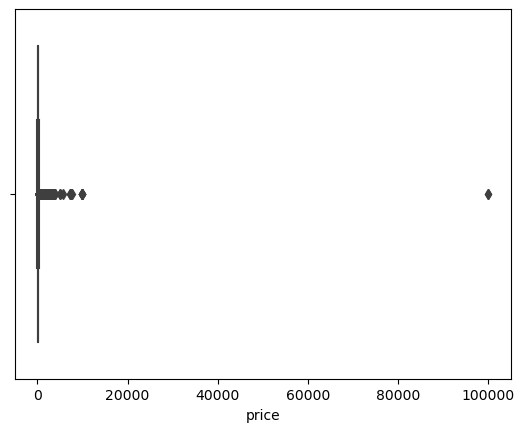

In [8]:
## Univariant Analysis on Price

sns.boxplot(df,x='price')

We can see data spread is upto 20000. So, we can filter out the outliers here

<Axes: xlabel='price'>

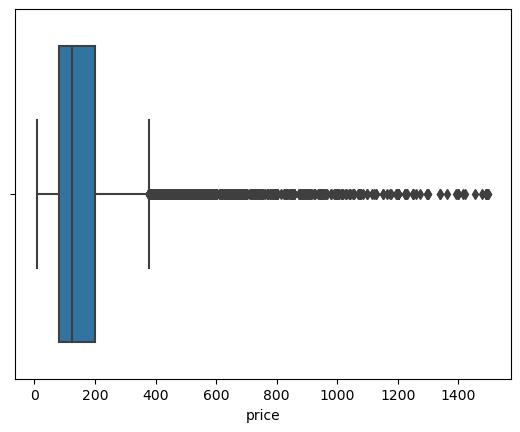

In [9]:
data = df[df['price']<1500]
sns.boxplot(data,x = 'price')

Text(0.5, 0, 'Price')

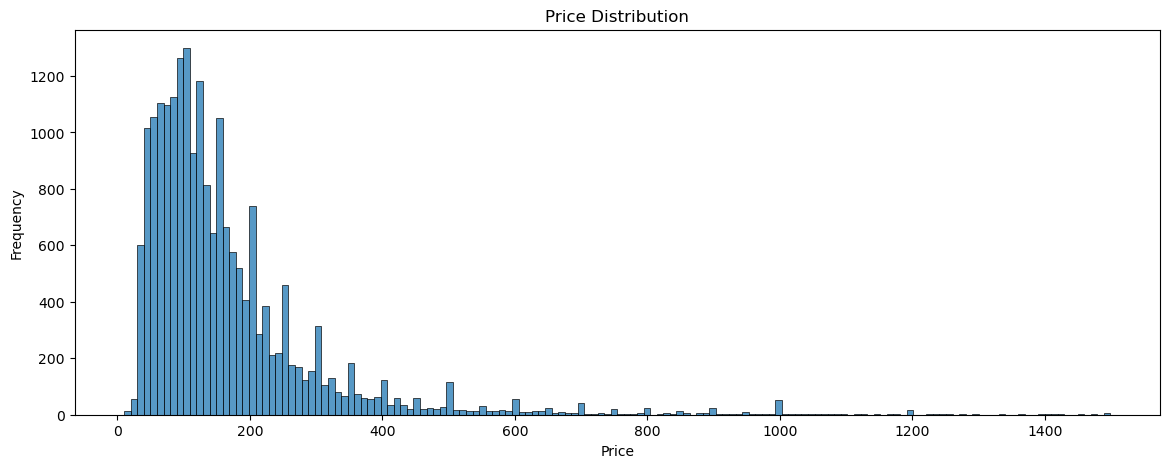

In [10]:

plt.figure(figsize=(14,5))
sns.histplot(data,x='price',bins=150)
plt.title("Price Distribution")
plt.ylabel("Frequency")
plt.xlabel("Price")

In above Distribution we can Observe the price is left skewed. Major part of price is within or lessthan 800

Text(0.5, 0, 'Rooms')

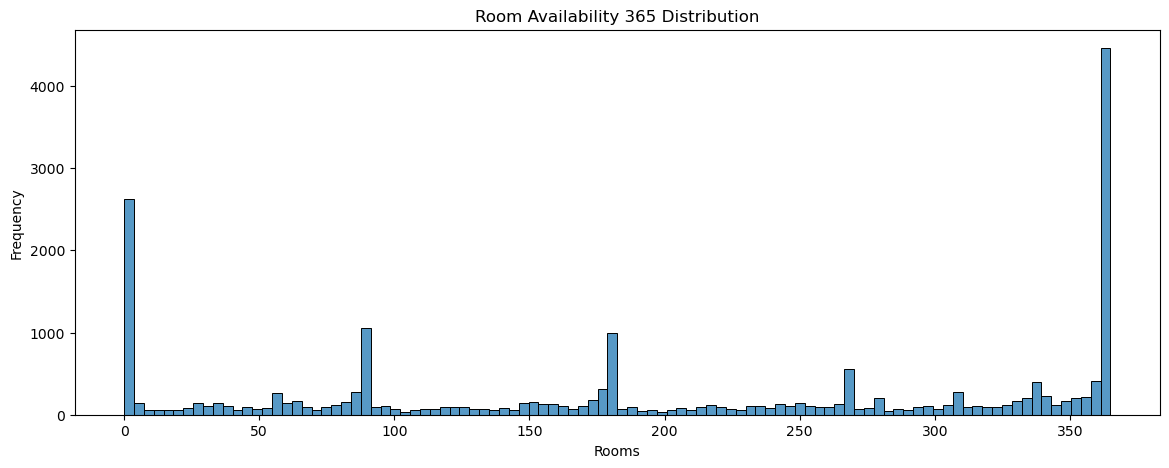

In [11]:
### Room availability over year(365 Days)
plt.figure(figsize=(14,5))
sns.histplot(data,x='availability_365',bins=100)
plt.title("Room Availability 365 Distribution")
plt.ylabel("Frequency")
plt.xlabel("Rooms")

In [12]:
## Average price by Town wise in new york city
data.groupby("neighbourhood_group")['price'].mean()

neighbourhood_group
Bronx            107.990506
Brooklyn         155.138317
Manhattan        204.076470
Queens           121.681939
Staten Island    118.780069
Name: price, dtype: float64

In [13]:
### Average price per bed in New York city

data['Price per bed'] = data['price']/data['beds']
data.groupby('neighbourhood_group')['Price per bed'].mean()

neighbourhood_group
Bronx             74.713639
Brooklyn          99.788493
Manhattan        138.662489
Queens            76.336210
Staten Island     67.728101
Name: Price per bed, dtype: float64

<Axes: >

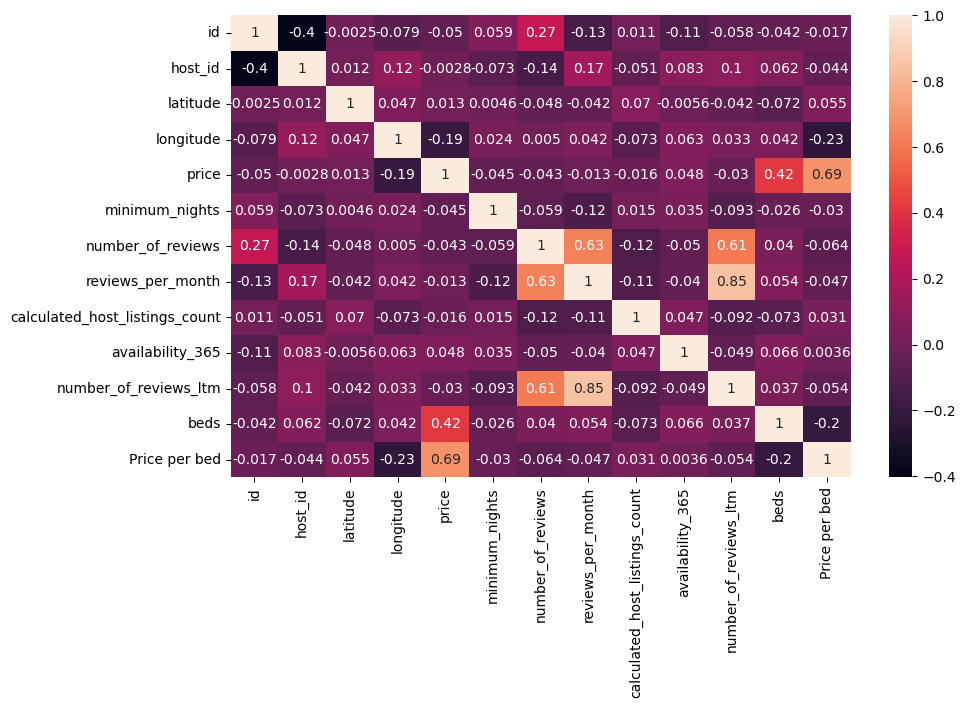

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)

In [15]:
data.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,beds,Price per bed
id,1.000000,-0.403825,-0.002544,-0.079022,-0.049729,0.058565,0.271177,-0.131094,0.010737,-0.106934,-0.058185,-0.041736,-0.016688
host_id,-0.403825,1.000000,0.011951,0.121836,-0.002823,-0.072900,-0.140562,0.170227,-0.050764,0.083341,0.100431,0.061698,-0.043619
latitude,-0.002544,0.011951,1.000000,0.047242,0.012722,0.004586,-0.047836,-0.041733,0.070168,-0.005648,-0.041632,-0.071798,0.055493
longitude,-0.079022,0.121836,0.047242,1.000000,-0.193625,0.023945,0.004958,0.041778,-0.073089,0.063239,0.033122,0.041912,-0.233815
price,-0.049729,-0.002823,0.012722,-0.193625,1.000000,-0.044635,-0.043451,-0.012726,-0.016365,0.047961,-0.029914,0.415291,0.687330
minimum_nights,0.058565,-0.072900,0.004586,0.023945,-0.044635,1.000000,-0.059006,-0.122539,0.015017,0.035389,-0.092596,-0.025874,-0.030452
number_of_reviews,0.271177,-0.140562,-0.047836,0.004958,-0.043451,-0.059006,1.000000,0.630952,-0.115098,-0.049711,0.606256,0.040071,-0.064256
reviews_per_month,-0.131094,0.170227,-0.041733,0.041778,-0.012726,-0.122539,0.630952,1.000000,-0.109216,-0.040220,0.850092,0.053575,-0.047008
calculated_host_listings_count,0.010737,-0.050764,0.070168,-0.073089,-0.016365,0.015017,-0.115098,-0.109216,1.000000,0.047038,-0.092168,-0.072758,0.031067
availability_365,-0.106934,0.083341,-0.005648,0.063239,0.047961,0.035389,-0.049711,-0.040220,0.047038,1.000000,-0.048942,0.065860,0.003616


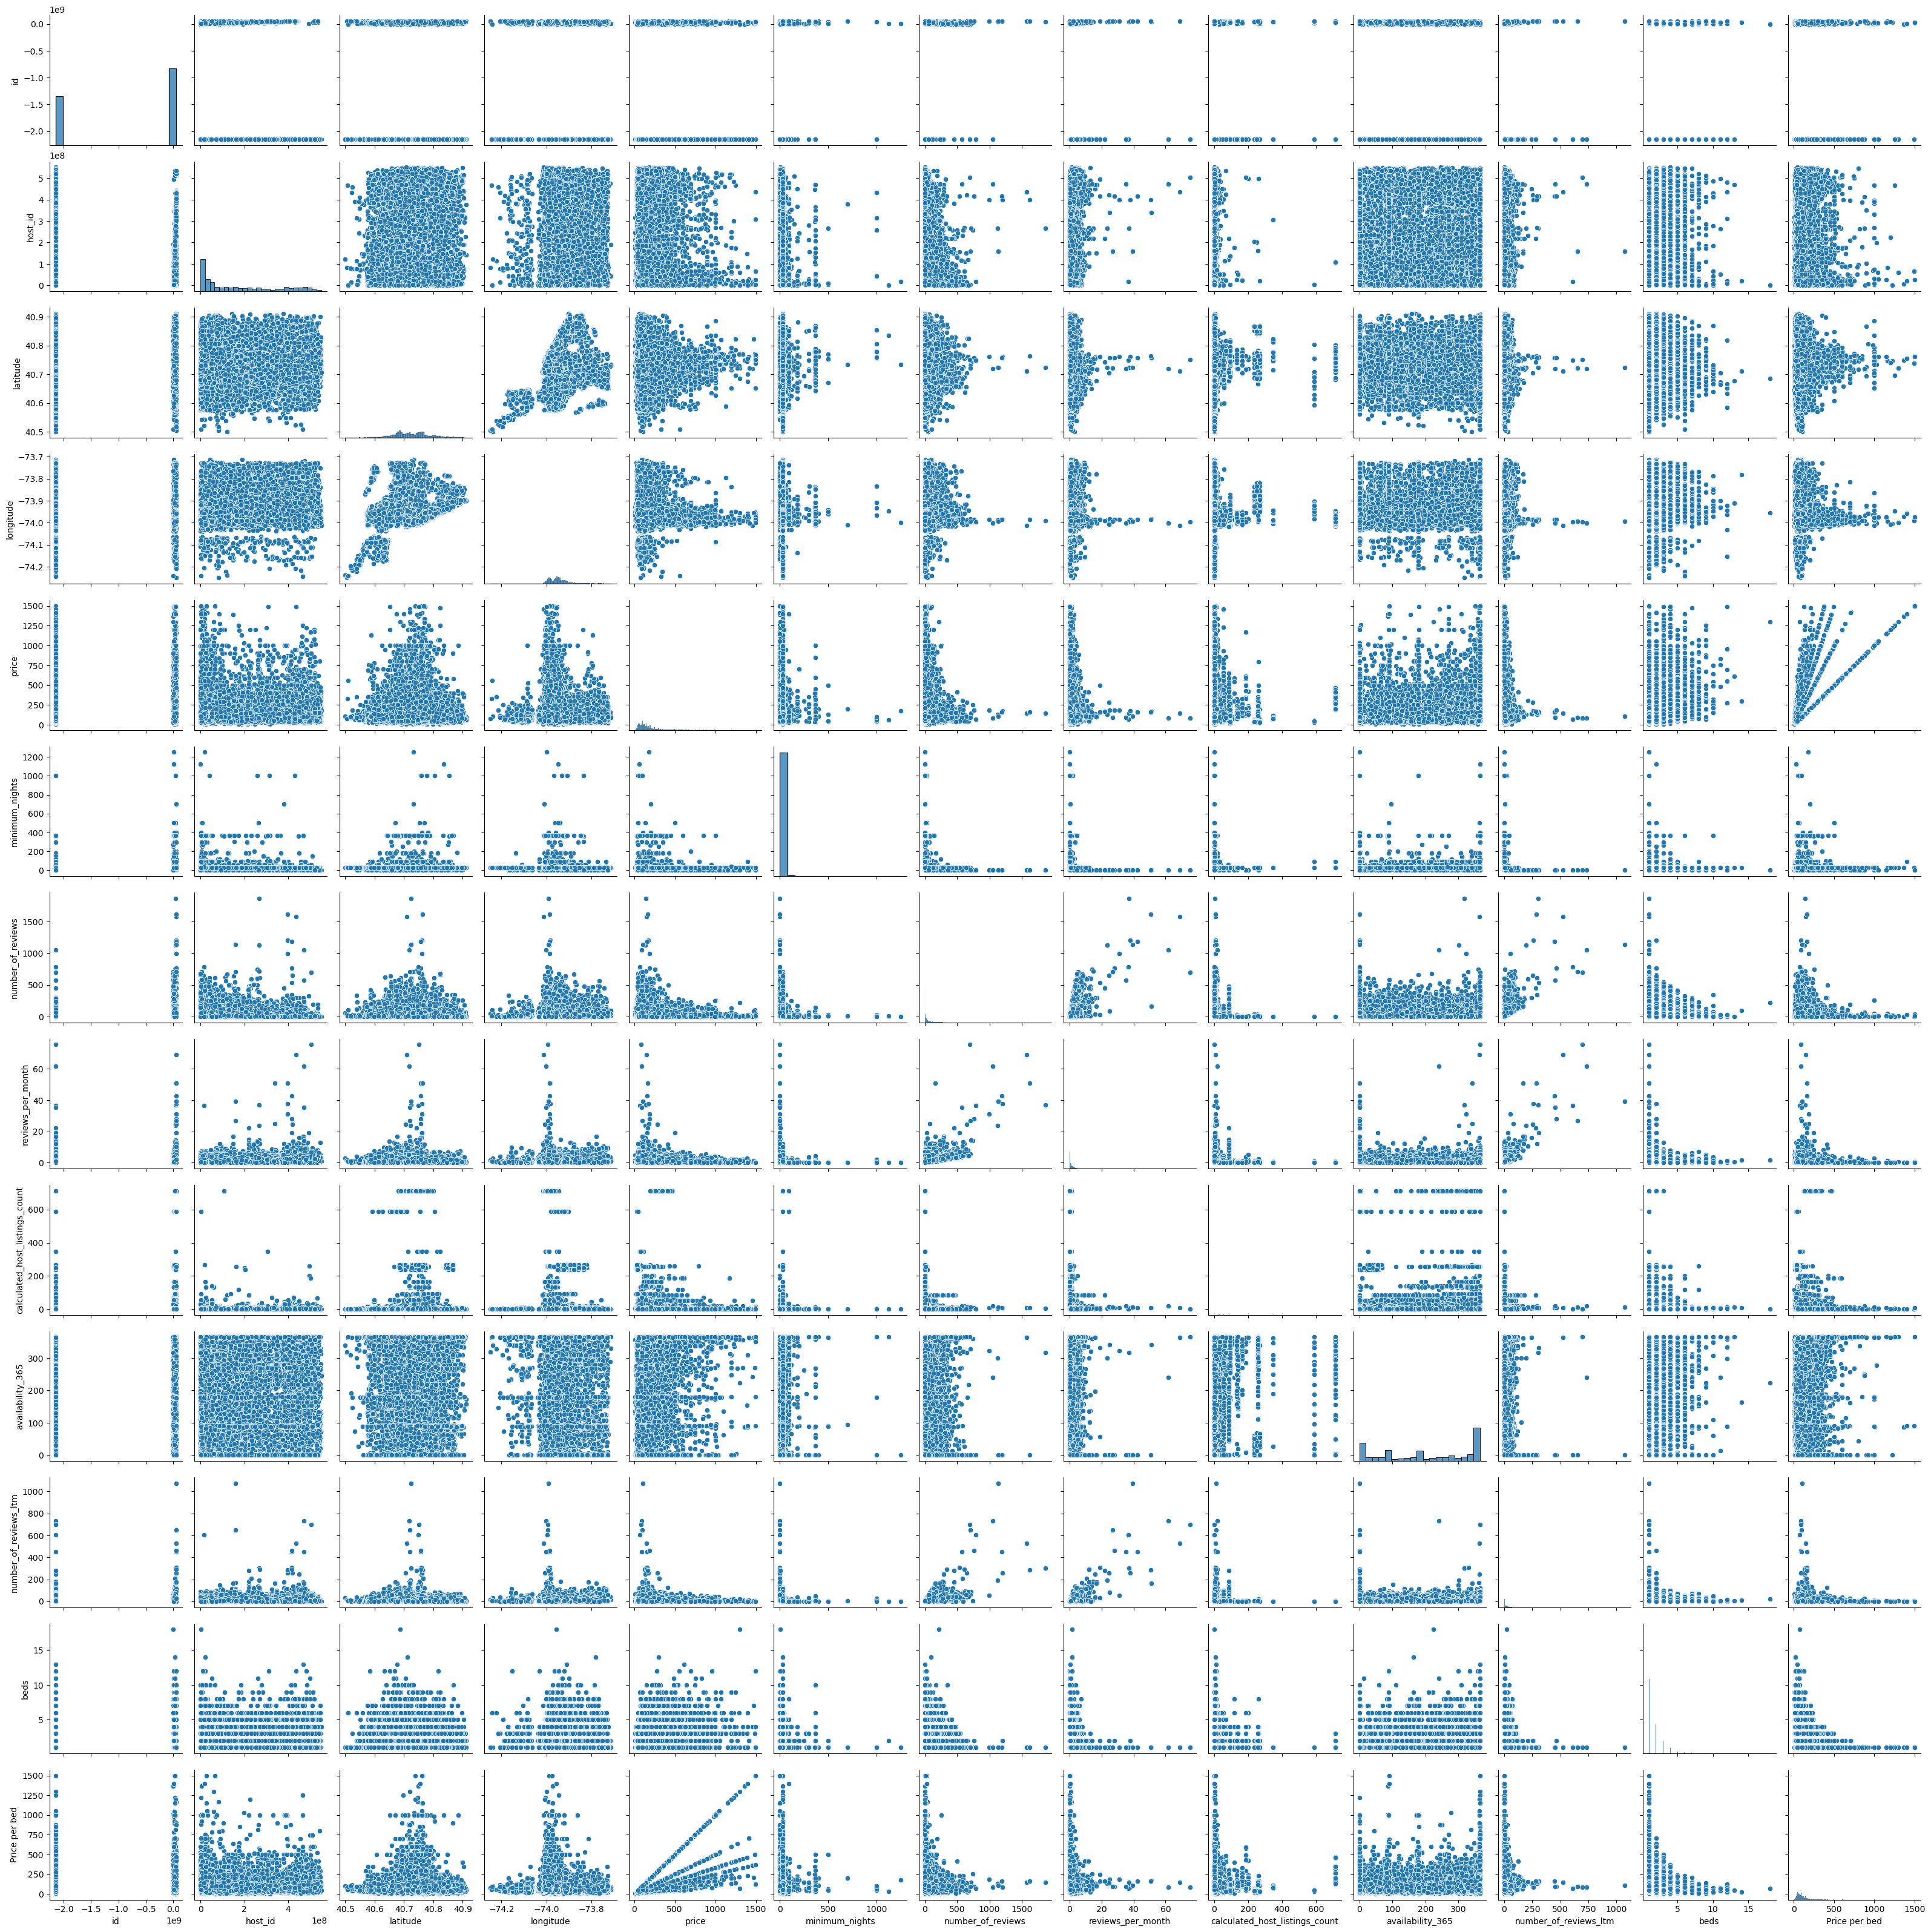

In [16]:
sns.pairplot(data)

<Axes: xlabel='neighbourhood_group', ylabel='price'>

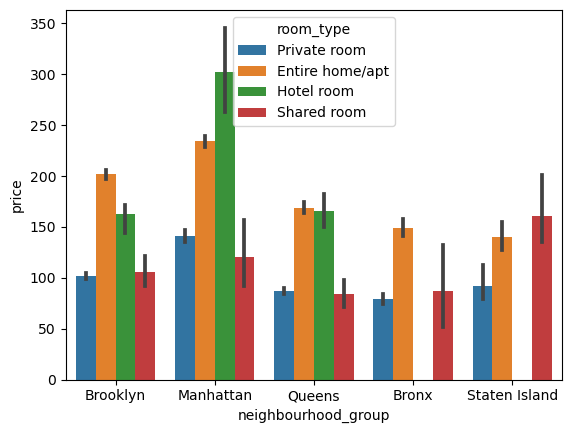

In [17]:
sns.barplot(data,x='neighbourhood_group',y = 'price',hue='room_type')

<Axes: xlabel='number_of_reviews', ylabel='price'>

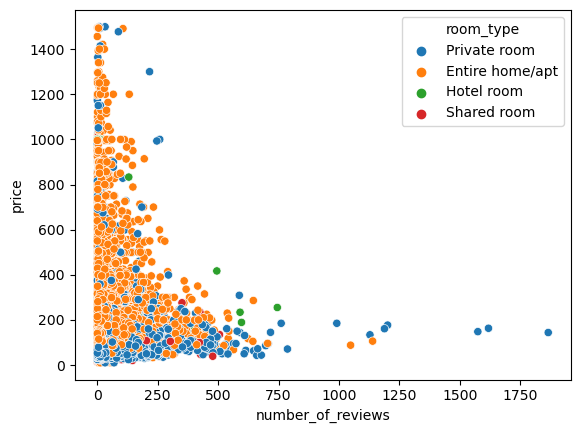

In [18]:
sns.scatterplot(data,x='number_of_reviews',y = 'price',hue='room_type')

In [19]:
data['room_type'].value_counts()

Entire home/apt    11479
Private room        8773
Shared room          287
Hotel room           109
Name: room_type, dtype: int64

<Axes: xlabel='availability_365', ylabel='room_type'>

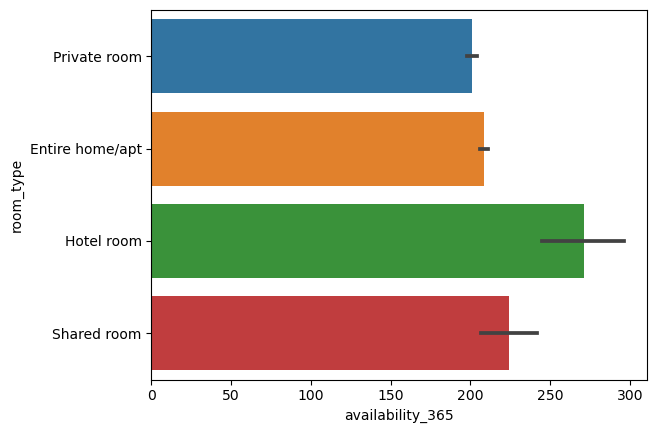

In [20]:
sns.barplot(data,x='availability_365',y='room_type')